In [2]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv("Tweets.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

(array([3099.,    0.,    0.,    0.,    0., 2363.,    0.,    0.,    0.,
        9178.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

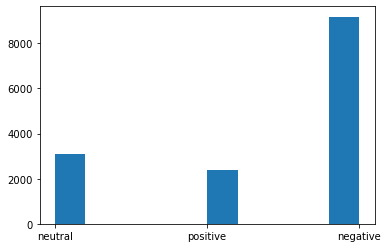

In [9]:
import matplotlib.pyplot as plt
plt.hist(y)

# Spliting on train, test

In [10]:
from sklearn.model_selection import train_test_split

# Preprocessing

In [1]:
import text_normalizer as tn

2021-05-19 17:00:59 INFO: Downloading default packages for language: en (English)...
2021-05-19 17:01:00 INFO: File exists: C:\Users\user\stanza_resources\en\default.zip.
2021-05-19 17:01:04 INFO: Finished downloading models and saved to C:\Users\user\stanza_resources.
2021-05-19 17:01:04 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-05-19 17:01:04 INFO: Use device: cpu
2021-05-19 17:01:04 INFO: Loading: tokenize
2021-05-19 17:01:04 INFO: Loading: pos
2021-05-19 17:01:05 INFO: Loading: lemma
2021-05-19 17:01:05 INFO: Loading: depparse
2021-05-19 17:01:06 INFO: Loading: sentiment
2021-05-19 17:01:07 INFO: Loading: ner
2021-05-19 17:01:07 INFO: Done loading processors!
2021-05-19 17:01:07 INFO: Loading these models for language: en (English):
| Processor | Package   |


In [20]:
cleaned_text = tn.normalize_corpus(df['text'], contraction_expansion=True, accented_char_removal=True,
                     special_char_removal=True, remove_digits=True,
                     repeated_characters_remover=True, text_lower_case=True,
                     stop_words_remover = True, text_lemmatization=False, mentioning_remover = True, stopword_removal =True)

In [35]:
df['CleanTweet'] = cleaned_text
df = df.replace(r'^(\s?)+$', np.nan, regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [38]:
df = df.dropna(subset=['CleanTweet']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14613 entries, 0 to 14612
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14613 non-null  int64  
 1   airline_sentiment             14613 non-null  object 
 2   airline_sentiment_confidence  14613 non-null  float64
 3   negativereason                9170 non-null   object 
 4   negativereason_confidence     10510 non-null  float64
 5   airline                       14613 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14613 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14613 non-null  int64  
 10  text                          14613 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14613 non-null  object 
 13  t

In [59]:
X_clean = df['CleanTweet'].to_numpy()
y =  df['airline_sentiment'].to_numpy()

X_clean = np.reshape(X_clean, (X_clean.shape[0],1))
print(X_clean.shape,y.shape)

(14613, 1) (14613,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9790, 1) (4823, 1) (9790,) (4823,)


In [61]:
X_train

array([['spoke rep phone suggested voice concern via ehemail us site moments ago'],
       ['flt last nght cancelled flightedmech probs flt cancelled flightedsnow finally flt home st cls ehempty amp not let sit'],
       ['still not air deicing plane miss connect customer service helpful hoping catch next flight'],
       ...,
       ['award travel ticket cannot since different last name simply need change'],
       ['power trip felt completely threatened unsafe angry derrick bussey dca would like reiterate'],
       ['service rep not happened yet honestly fed sick no notice flight got cancelled flighted']],
      dtype=object)

In [62]:
y

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [48]:
import tokenizer
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [51]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['CleanTweet'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 11890 unique tokens.


In [57]:
import tensorflow as tf

In [58]:
X = tokenizer.texts_to_sequences(df['CleanTweet'].values)
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (14613, 250)


In [63]:
Y = pd.get_dummies(df['airline_sentiment']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (14613, 3)


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(13151, 250) (13151, 3)
(1462, 250) (1462, 3)


In [72]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

In [74]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 11835 samples, validate on 1316 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
11835/11835 [==============================] - 99s 8ms/sample - loss: 0.7281 - acc: 0.7012 - val_loss: 0.6073 - val_acc: 0.7561
Epoch 2/5
11835/11835 [==============================] - 100s 8ms/sample - loss: 0.4455 - acc: 0.8253 - val_loss: 0.5541 - val_acc: 0.7789
Epoch 3/5
11835/11835 [==============================] - 99s 8ms/sample - loss: 0.3248 - acc: 0.8800 - val_loss: 0.5959 - val_acc: 0.7804
Epoch 4/5
11835/11835 [==============================] - 100s 8ms/sample - loss: 0.2502 - acc: 0.9096 - val_loss: 0.6476 - val_acc: 0.7781
Epoch 5/5
11835/11835 [==============================] - 100s 8ms/sample - loss: 0.1963 - acc: 0.9294 - val_loss: 0.7366 - val_acc: 0.7705


In [75]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1462/1462 [==============================] - 2s 1ms/sample - loss: 0.7397 - acc: 0.7654
Test set
  Loss: 0.740
  Accuracy: 0.765


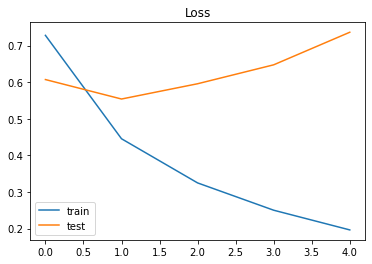

In [76]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

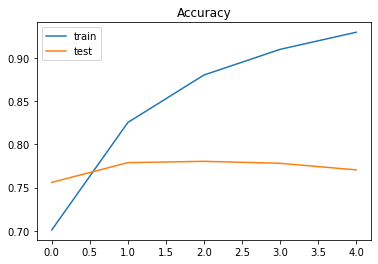

In [77]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

# I see that model overfits. I need more time to deal with that

## For better evaluation classification models I will use Confusion matrix after model tunning

# Tried to use example

overfits too

In [86]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(3, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_5 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 2,758,019
Trainable params: 2,758,019
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, batch_size=32, epochs=2, validation_data=(X_test, Y_test))

Train on 13151 samples, validate on 1462 samples
Epoch 1/2
13151/13151 [==============================] - 347s 26ms/sample - loss: 0.1736 - acc: 0.9356 - val_loss: 0.3915 - val_acc: 0.8500
Epoch 2/2
13151/13151 [==============================] - 358s 27ms/sample - loss: 0.1295 - acc: 0.9530 - val_loss: 0.4262 - val_acc: 0.8493


Train on 11835 samples, validate on 1316 samples
Epoch 1/2
11835/11835 [==============================] - 320s 27ms/sample - loss: 0.0945 - acc: 0.9672 - val_loss: 0.1198 - val_acc: 0.9567
Epoch 2/2
11835/11835 [==============================] - 315s 27ms/sample - loss: 0.0726 - acc: 0.9756 - val_loss: 0.1501 - val_acc: 0.9493


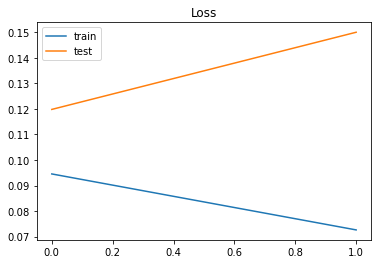

In [94]:
history2 = model.fit(X_train, Y_train, epochs=2, batch_size=32,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
plt.title('Loss')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

In [95]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1462/1462 [==============================] - 4s 3ms/sample - loss: 0.5401 - acc: 0.8415
Test set
  Loss: 0.540
  Accuracy: 0.842
